In [1]:
import geopandas as gpd
import pandas as pd

import json
import osm2geojson
import requests

import datetime

import matplotlib.pyplot as plt


import numpy as np
from tqdm import tqdm

In [2]:
#alt.data_transformers.enable("vegafusion")

In [3]:
#This Script gets a geometry from osm via overpass and gets a osm streetnetwork incl history for this geometry.
# then a virtual street network for each year (1st of Jan) is created to vizualize via altair.

In [4]:
#shape_name= "Neukölln"
#shape_name= "Berlin"
shape_name= "Deutschland"
shape_name_str=shape_name.replace("ö","oe")

# read poly

In [5]:
gdf_osm_shape_poly = gpd.read_file("osm_files/"+ shape_name_str+ "_poly_shape.geojson")

<Axes: >

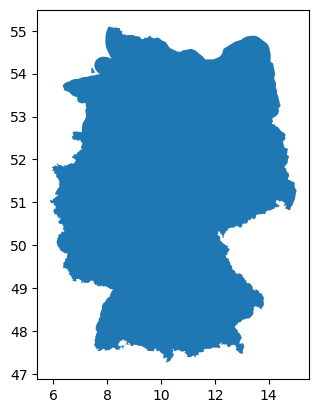

In [6]:
gdf_osm_shape_poly.plot()

# get network (2017 & 2024)

In [25]:
osm_roads_all = gpd.read_parquet("osm_files/"+ shape_name_str+ "_roads_allYears.parquet")

In [26]:
osm_roads_all.head()

,highway,maxspeed,maxspeed:conditional,id,year,geometry
0,tertiary,None,None,99,2017,"MULTILINESTRING ((11.36617 48.17419, 11.3662 4..."
1,secondary,100,None,100,2017,"MULTILINESTRING ((11.33035 48.18011, 11.33028 ..."
2,secondary,50,None,122,2017,"MULTILINESTRING ((13.73065 51.03015, 13.73085 ..."
3,tertiary,50,None,123,2017,"MULTILINESTRING ((13.74848 51.0325, 13.74845 5..."
4,primary,50,None,1978,2017,"MULTILINESTRING ((9.91453 53.47044, 9.91527 53..."


In [27]:
osm_roads_all[osm_roads_all.year=="2024"]

,highway,maxspeed,maxspeed:conditional,id,year,geometry
831760,tertiary,None,None,99,2024,"MULTILINESTRING ((11.36639 48.17411, 11.36643 ..."
831761,secondary,100,None,100,2024,"MULTILINESTRING ((11.33037 48.1801, 11.33032 4..."
831762,secondary,50,None,122,2024,"MULTILINESTRING ((13.73065 51.03015, 13.73085 ..."
831763,tertiary,50,None,123,2024,"MULTILINESTRING ((13.74848 51.0325, 13.74845 5..."
831764,primary,50,None,1978,2024,"MULTILINESTRING ((9.91454 53.47043, 9.91516 53..."
...,...,...,...,...,...,...
1984562,tertiary,50,None,1236125759,2024,"MULTILINESTRING ((8.88736 51.9476, 8.88694 51...."
1984563,tertiary,50,None,1236125760,2024,"MULTILINESTRING ((8.88793 51.94701, 8.88797 51..."
1984564,tertiary,50,None,1236125761,2024,"MULTILINESTRING ((8.88811 51.94772, 8.88806 51..."
1984565,tertiary,50,None,1236125762,2024,"MULTILINESTRING ((8.88795 51.94736, 8.88794 51..."


In [28]:
osm_roads_all = osm_roads_all.to_crs(epsg=25832)

In [29]:
#osm_roads_all["length"] = osm_roads_all.geometry.length

In [169]:
#raster = gpd.read_file(r"DE_Grid_ETRS89-UTM32_1km.gpkg\DE_Grid_ETRS89-UTM32_1km.gpkg\geogitter\DE_Grid_ETRS89-UTM32_1km.gpkg")
#raster = gpd.read_file(r"DE_Grid_ETRS89-UTM32_1km.gpkg\Zensus2022_grid_final_7053549391879339012.gpkg")

In [170]:
#raster.to_parquet(r"DE_Grid_ETRS89-UTM32_1km.gpkg\Zensus2022_grid_final_7053549391879339012.parquet")
raster = gpd.read_parquet(r"DE_Grid_ETRS89-UTM32_1km.gpkg\Zensus2022_grid_final_7053549391879339012.parquet")

In [176]:
raster=raster[["id","Einwohner","geometry"]].copy()

In [185]:
raster

,id,Einwohner,geometry
0,1kmN2692E4341,21.0,"MULTIPOLYGON (((1142634.394 5997957.954, 11441..."
1,1kmN2692E4344,18.0,"MULTIPOLYGON (((1147050.277 5997940.929, 11485..."
2,1kmN2693E4340,29.0,"MULTIPOLYGON (((1141167.27 5999441.922, 114263..."
3,1kmN2694E4340,17.0,"MULTIPOLYGON (((1141172.111 6000920.989, 11426..."
4,1kmN2694E4343,9.0,"MULTIPOLYGON (((1145589.527 6000904.744, 11470..."
...,...,...,...
384176,1kmN3555E4200,NaN,"MULTIPOLYGON (((902321.335 7378578.267, 904063..."
384177,1kmN3555E4201,NaN,"MULTIPOLYGON (((904063.338 7378623.975, 905805..."
384178,1kmN3556E4196,NaN,"MULTIPOLYGON (((895305.159 7380138.895, 897047..."
384179,1kmN3556E4197,NaN,"MULTIPOLYGON (((897047.472 7380186.141, 898789..."


In [172]:
#raster

In [173]:
#raster["id"]

In [31]:
osm_roads_all.maxspeed.value_counts(dropna=False)[:30]

maxspeed
50                  849803
None                560731
100                 214299
70                  190320
30                   87032
60                   43476
80                   26803
40                    8103
20                    1947
DE:urban               733
10                     323
DE:rural               252
none                   196
90                     178
signals                106
120                     94
5                       28
58                      13
65                      12
15                      10
130                      7
30;50                    7
variable                 6
50;70                    6
DE:living_street         5
60;80                    5
walk                     5
100;70;50                4
3                        4
7                        4
Name: count, dtype: int64

In [177]:
osm_roads_all['complete'] = osm_roads_all['maxspeed'].fillna('None').apply(lambda x: 'no' if x == 'None' else 'yes')

In [178]:
osm_roads_all

,highway,maxspeed,maxspeed:conditional,id,year,geometry,complete
0,tertiary,None,None,99,2017,"MULTILINESTRING ((675905.319 5338368.024, 6759...",no
1,secondary,100,None,100,2017,"MULTILINESTRING ((673222.226 5338945.481, 6732...",yes
2,secondary,50,None,122,2017,"MULTILINESTRING ((831653.548 5663833.164, 8316...",yes
3,tertiary,50,None,123,2017,"MULTILINESTRING ((832886.265 5664175.265, 8328...",yes
4,primary,50,None,1978,2017,"MULTILINESTRING ((560704.374 5924994.052, 5607...",yes
...,...,...,...,...,...,...,...
1984562,tertiary,50,None,1236125759,2024,"MULTILINESTRING ((492258.021 5755215.876, 4922...",yes
1984563,tertiary,50,None,1236125760,2024,"MULTILINESTRING ((492297.051 5755150.053, 4923...",yes
1984564,tertiary,50,None,1236125761,2024,"MULTILINESTRING ((492309.431 5755229.798, 4923...",yes
1984565,tertiary,50,None,1236125762,2024,"MULTILINESTRING ((492298.815 5755189.084, 4922...",yes


In [179]:
#osm_roads_all

In [180]:

# Ensure both GeoDataFrames have the same CRS
#gdf_lines = osm_roads_all[::100].to_crs(25832).copy()
gdf_lines = osm_roads_all.to_crs(25832).copy()
gdf_polygons = raster.to_crs(25832).copy()

agg_pivot=pd.DataFrame()

# Reset index to access the timestamp
gdf_lines = gdf_lines.reset_index()

# **🚀 Step 1: Pre-Filter Polygons that Contain at Least One Line**
gdf_polygons_filtered = gdf_polygons.sjoin(gdf_lines, how="inner", predicate="intersects").drop_duplicates(subset=['id_left'])[['id_left', 'geometry']]

# Define the years and speed categories to consider
speed_categories = ["yes", "no"]

# **🚀 Step 2: Filter relevant lines once**
gdf_lines_filtered = gdf_lines[gdf_lines["complete"].isin(speed_categories)]

# **🚀 Step 3: Clip all lines to polygons at once**
gdf_clipped = gdf_lines_filtered.overlay(gdf_polygons_filtered, how="intersection")

# **🚀 Step 4: Compute Lengths Efficiently**
gdf_clipped["length"] = gdf_clipped.geometry.length

# **🚀 Step 5: Aggregate by Polygon, Year, and Speed**
agg_data = gdf_clipped.groupby(["id_left", "complete"])["length"].sum().reset_index()

# **🚀 Step 6: Pivot to create year/speed columns**
agg_pivot = agg_data.pivot(index="id_left", columns=["complete"], values="length").fillna(0)

# ✅ **Convert MultiIndex to Strings for Easier Column Handling**
#agg_pivot.columns = [f"{str(col[1])}" for col in agg_pivot.columns]

agg_pivot=agg_pivot.reset_index()
#
## **🚀 Step 7: Compute Total Length & Ratios**
agg_pivot["total_length"] = agg_pivot["yes"] + agg_pivot["no"]
agg_pivot["ratio_complete"] = agg_pivot["yes"] / agg_pivot["total_length"]

## **🚀 Step 8: Merge Results Back**
#gdf_polygons_res = gdf_polygons_filtered.merge(agg_pivot, left_on="id_left", right_index=True, how="left").fillna(0)


In [181]:
agg_pivot

complete,id_left,no,yes,total_length,ratio_complete
0,1kmN2693E4341,0.00000,1353.550415,1353.550415,1.000000
1,1kmN2694E4341,0.00000,2122.342041,2122.342041,1.000000
2,1kmN2695E4341,0.00000,2516.942181,2516.942181,1.000000
3,1kmN2696E4341,0.00000,87.366270,87.366270,1.000000
4,1kmN2696E4342,0.00000,2158.656475,2158.656475,1.000000
...,...,...,...,...,...
211385,1kmN3E4471,0.00000,601.029678,601.029678,1.000000
211386,1kmN3E4472,1207.43061,1220.766667,2428.197277,0.502746
211387,1kmN3E4475,0.00000,2250.850256,2250.850256,1.000000
211388,1kmN3E4479,0.00000,2127.177671,2127.177671,1.000000


In [182]:
gdf_polygons_res = gdf_polygons_filtered.merge(agg_pivot, on="id_left", how="left").fillna(0)


In [183]:
gdf_polygons_res

,id_left,geometry,no,yes,total_length,ratio_complete
0,1kmN2696E4341,"MULTIPOLYGON (((595465.662 5247866.582, 596464...",0.000000,87.366270,87.366270,1.000000
1,1kmN2697E4342,"MULTIPOLYGON (((596451.784 5248879.585, 597450...",0.000000,865.267405,865.267405,1.000000
2,1kmN2698E4340,"MULTIPOLYGON (((594441.168 5249854.626, 595440...",213.260660,1875.227034,2088.487694,0.897888
3,1kmN2699E4339,"MULTIPOLYGON (((593429.458 5250842.3, 594428.3...",440.252371,0.000000,440.252371,0.000000
4,1kmN2699E4341,"MULTIPOLYGON (((595427.286 5250867.634, 596426...",0.000000,1362.070391,1362.070391,1.000000
...,...,...,...,...,...,...
211385,1kmN3545E4218,"MULTIPOLYGON (((461041.029 6094973.375, 462040...",0.000000,2019.401153,2019.401153,1.000000
211386,1kmN3546E4221,"MULTIPOLYGON (((464024.416 6096014.094, 465023...",613.447552,173.477759,786.925312,0.220450
211387,1kmN3548E4218,"MULTIPOLYGON (((460998.819 6097973.053, 461997...",0.000000,1487.819498,1487.819498,1.000000
211388,1kmN3548E4219,"MULTIPOLYGON (((461997.968 6097986.655, 462997...",293.862271,2214.882624,2508.744896,0.882865


<Axes: >

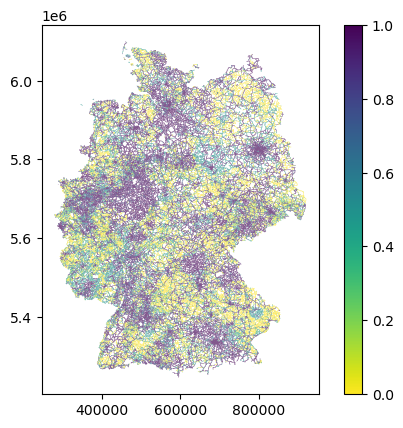

In [207]:
gdf_polygons_res.plot(column="ratio_complete", legend=True, cmap="viridis_r")

In [216]:
gdf_polygons_res_ew=gdf_polygons_res.merge(raster[["id","Einwohner"]], left_on="id_left",right_on="id", how="left")

In [217]:
gdf_polygons_res_ew

,id_left,geometry,no,yes,total_length,ratio_complete,id,Einwohner
0,1kmN2696E4341,"MULTIPOLYGON (((595465.662 5247866.582, 596464...",0.000000,87.366270,87.366270,1.000000,1kmN2696E4341,8.0
1,1kmN2697E4342,"MULTIPOLYGON (((596451.784 5248879.585, 597450...",0.000000,865.267405,865.267405,1.000000,1kmN2697E4342,68.0
2,1kmN2698E4340,"MULTIPOLYGON (((594441.168 5249854.626, 595440...",213.260660,1875.227034,2088.487694,0.897888,1kmN2698E4340,15.0
3,1kmN2699E4339,"MULTIPOLYGON (((593429.458 5250842.3, 594428.3...",440.252371,0.000000,440.252371,0.000000,1kmN2699E4339,125.0
4,1kmN2699E4341,"MULTIPOLYGON (((595427.286 5250867.634, 596426...",0.000000,1362.070391,1362.070391,1.000000,1kmN2699E4341,1906.0
...,...,...,...,...,...,...,...,...
211385,1kmN3545E4218,"MULTIPOLYGON (((461041.029 6094973.375, 462040...",0.000000,2019.401153,2019.401153,1.000000,1kmN3545E4218,NaN
211386,1kmN3546E4221,"MULTIPOLYGON (((464024.416 6096014.094, 465023...",613.447552,173.477759,786.925312,0.220450,1kmN3546E4221,NaN
211387,1kmN3548E4218,"MULTIPOLYGON (((460998.819 6097973.053, 461997...",0.000000,1487.819498,1487.819498,1.000000,1kmN3548E4218,NaN
211388,1kmN3548E4219,"MULTIPOLYGON (((461997.968 6097986.655, 462997...",293.862271,2214.882624,2508.744896,0.882865,1kmN3548E4219,NaN


In [203]:
gdf_polygons_res_ew=gdf_polygons_res_ew[gdf_polygons_res_ew.Einwohner>100]

In [204]:
#gdf_polygons_res_ew

<Axes: >

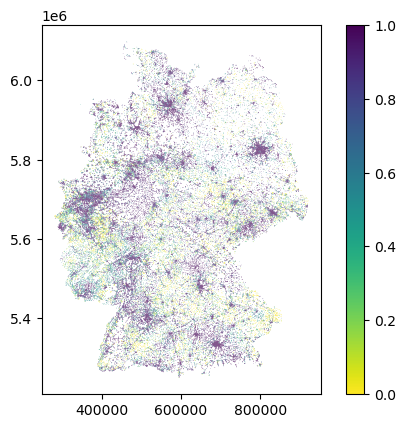

In [206]:
gdf_polygons_res_ew.plot(column="ratio_complete", legend=True, cmap="viridis_r")

In [208]:
gdf_polygons_res_ew

,id_left,geometry,no,yes,total_length,ratio_complete,id,Einwohner
3,1kmN2699E4339,"MULTIPOLYGON (((593429.458 5250842.3, 594428.3...",440.252371,0.000000,440.252371,0.000000,1kmN2699E4339,125.0
4,1kmN2699E4341,"MULTIPOLYGON (((595427.286 5250867.634, 596426...",0.000000,1362.070391,1362.070391,1.000000,1kmN2699E4341,1906.0
5,1kmN2700E4339,"MULTIPOLYGON (((593416.656 5251842.64, 594415....",0.000000,3531.161307,3531.161307,1.000000,1kmN2700E4339,321.0
6,1kmN2700E4341,"MULTIPOLYGON (((595414.49 5251867.978, 596413....",0.000000,4104.102220,4104.102220,1.000000,1kmN2700E4341,666.0
13,1kmN2702E4342,"MULTIPOLYGON (((596387.818 5253881.318, 597386...",0.000000,2265.215664,2265.215664,1.000000,1kmN2702E4342,128.0
...,...,...,...,...,...,...,...,...
211244,1kmN3518E4285,"MULTIPOLYGON (((528365.667 6068902.814, 529364...",73.819097,3009.160568,3082.979665,0.976056,1kmN3518E4285,374.0
211246,1kmN3519E4279,"MULTIPOLYGON (((522356.476 6069818.634, 523355...",2021.026047,0.000000,2021.026047,0.000000,1kmN3519E4279,137.0
211248,1kmN3522E4294,"MULTIPOLYGON (((537301.419 6073028.719, 538300...",822.948788,1770.177746,2593.126534,0.682642,1kmN3522E4294,118.0
211253,1kmN3524E4281,"MULTIPOLYGON (((524283.926 6074845.886, 525283...",842.953387,0.000000,842.953387,0.000000,1kmN3524E4281,142.0


<Axes: >

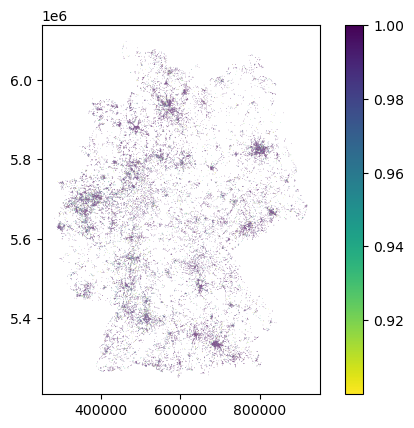

In [213]:
gdf_polygons_res_ew[gdf_polygons_res_ew.ratio_complete>0.90].plot(column="ratio_complete", legend=True, cmap="viridis_r")

In [219]:
gdf_polygons_res_ew[gdf_polygons_res_ew.ratio_complete>0.90].Einwohner.sum()

np.float64(41640756.0)

### monitor length

In [11]:
df_len=osm_roads_all.copy()

# Ensure the GeoDataFrame uses a projected CRS (for accurate length calculation)
if df_len.crs is None or df_len.crs.is_geographic:
    df_len = df_len.to_crs(epsg=25832)  # Convert to metric CRS (UTM for Germany)

# Compute the length of each line
df_len["length"] = df_len.geometry.length

# Group by year and maxspeed, then sum the lengths
length_summary = df_len.groupby(["year", "maxspeed"])["length"].sum().reset_index()

# Compute total length per year
total_length_per_year = df_len.groupby("year")["length"].sum().reset_index()
total_length_per_year["maxspeed"] = "Total"  # Mark it as total for merging later

# Merge total length data with the main summary
length_summary = pd.concat([length_summary, total_length_per_year], ignore_index=True)

# Convert length to kilometers for better readability
length_summary["length_km"] = length_summary["length"] / 1000

# Compute relative change for each maxspeed and total
length_summary["relative_change"] = length_summary.groupby("maxspeed")["length"].pct_change() * 100

In [12]:
length_summary

,year,maxspeed,length,length_km,relative_change
0,2017,30,4.250121e+06,4250.121312,NaN
1,2017,50,4.981491e+07,49814.905351,NaN
2,2024,30,6.428255e+06,6428.254627,51.248733
3,2024,50,6.225797e+07,62257.967306,24.978592
4,2017,Total,5.406503e+07,54065.026663,NaN
5,2024,Total,6.868622e+07,68686.221932,27.043722


In [13]:
osm_roads_all["maxspeed:conditional"].value_counts()

maxspeed:conditional
30 @ (22:00-06:00)                              4584
30 @ (Mo-Fr 07:00-17:00)                        1420
30 @ (Mo-Fr 07:00-18:00)                         630
30 @ (Mo-Fr 06:00-18:00)                         546
30 @ (00:00-06:00,22:00-24:00)                   435
                                                ... 
30 @ (Freibadsaisson)                              1
30 @(06:00-22:00)                                  1
30 @ (Mo - Fr 06:00 - 17:00)                       1
30@Mo-Sa 06:00-19:00                               1
30 @ (Mo-Fr 06:00-08:00,13:00-16:00; PH off)       1
Name: count, Length: 564, dtype: int64

In [14]:
df_len = osm_roads_all.copy()

# Ensure correct CRS for length calculation
if df_len.crs is None or df_len.crs.is_geographic:
    df_len = df_len.to_crs(epsg=25832)  # Convert to metric CRS (UTM for Germany)

# Compute length of each road segment
df_len["length"] = df_len.geometry.length

# **🚀 Step 1: Filter roads with maxspeed = 50 and conditional speed = 30 @ ...**
df_conditional_30 = df_len[
    (df_len["maxspeed"] == "50") & 
    (df_len["maxspeed:conditional"].notna()) & 
    (df_len["maxspeed:conditional"].str.startswith("30 @"))
].copy()

# **🚀 Step 2: Compute total length for roads with conditional maxspeed**
length_conditional_30 = df_conditional_30.groupby("year")["length"].sum().reset_index()
length_conditional_30.rename(columns={"length": "length_conditional_30"}, inplace=True)

# **🚀 Step 3: Compute total length for all maxspeed = 50 roads**
length_50 = df_len[df_len["maxspeed"] == "50"].groupby("year")["length"].sum().reset_index()
length_50.rename(columns={"length": "length_total_50"}, inplace=True)

# **🚀 Step 4: Merge both summaries together**
length_summary = length_50.merge(length_conditional_30, on="year", how="left").fillna(0)

# Convert to kilometers
length_summary["length_total_50_km"] = length_summary["length_total_50"] / 1000
length_summary["length_conditional_30_km"] = length_summary["length_conditional_30"] / 1000

# **🚀 Step 5: Compute percentage of roads affected by conditional speed limits**
length_summary["conditional_30_ratio"] = (length_summary["length_conditional_30"] / length_summary["length_total_50"]) * 100

# **🚀 Step 6: Compute relative change of conditional speed limits over years**
length_summary["relative_change_conditional_30"] = length_summary["length_conditional_30"].pct_change() * 100




In [15]:
length_summary

,year,length_total_50,length_conditional_30,length_total_50_km,length_conditional_30_km,conditional_30_ratio,relative_change_conditional_30
0,2017,4.981491e+07,2.849556e+05,49814.905351,284.955590,0.572029,NaN
1,2024,6.225797e+07,1.094280e+06,62257.967306,1094.280113,1.757655,284.017774


# read raster

In [ ]:
### special for Germany

In [16]:
bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland_fil=bland[~bland["id"].isin(["DE-MV","DE-NW","DE-TH"])]
#bland_fil=bland_fil.to_crs(25832)

In [17]:
raster = gpd.read_file(r"DE_Grid_ETRS89-UTM32_1km.gpkg\DE_Grid_ETRS89-UTM32_1km.gpkg\geogitter\DE_Grid_ETRS89-UTM32_1km.gpkg",
                      mask=bland_fil.to_crs(25832))

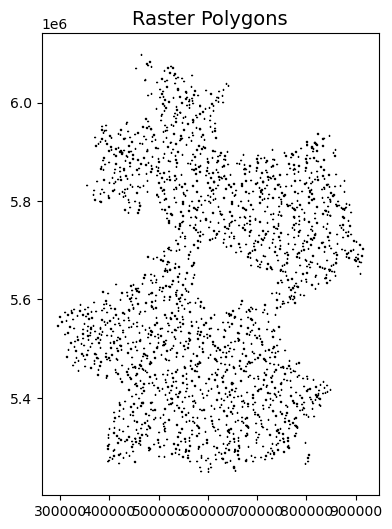

In [18]:

# Plot raster polygons with black edges
ax = raster[::100].plot(
    edgecolor="black",  # Set polygon borders to black
    facecolor="lightgray",  # Set fill color (adjust as needed)
    linewidth=1,  # Set border thickness
    figsize=(10, 6)  # Adjust figure size
)

# Add a title
plt.title("Raster Polygons", fontsize=14)

# Show plot
plt.show()

In [19]:
raster=raster[["id","geometry"]].copy()

# do some stuff (new Version)

* clip() is slow → Clipping large line datasets against many polygons can be computationally expensive.
* Looping over each polygon → This is inefficient; a spatial join may be faster.
* No progress tracking → You're unsure of function progress, making debugging harder. -> tqdm

In [20]:
#gdf_polygons_filtered.drop_duplicates(subset=['id_left'])

In [21]:
#import geopandas as gpd
#import pandas as pd
#import numpy as np
#from tqdm import tqdm
#
## Ensure both GeoDataFrames have the same CRS
#gdf_lines = osm_roads_all.to_crs(25832).copy()
#gdf_polygons = raster.to_crs(25832).copy()
#
## Reset index to access the timestamp
#gdf_lines = gdf_lines.reset_index()
#
## **🚀 Step 1: Pre-Filter Polygons that Contain at Least One Line**
#gdf_polygons_filtered = gdf_polygons.sjoin(gdf_lines, how="inner", predicate="intersects").drop_duplicates(subset=['id_left'])[['id_left', 'geometry']]
#
## Define the years and speed categories to consider
#years = ["2017", "2024"]
#speed_categories = ["30", "50"]
#
## **🚀 Step 2: Filter relevant lines once**
#gdf_lines_filtered = gdf_lines[gdf_lines["year"].isin(years) & gdf_lines["maxspeed"].isin(speed_categories)]
#
## **🚀 Step 3: Clip all lines to polygons at once**
#gdf_clipped = gdf_lines_filtered.overlay(gdf_polygons_filtered, how="intersection")
#
## **🚀 Step 4: Compute Lengths Efficiently**
#gdf_clipped["length"] = gdf_clipped.geometry.length
#
## **🚀 Step 5: Aggregate by Polygon, Year, and Speed**
#agg_data = gdf_clipped.groupby(["id_left", "year", "maxspeed"])["length"].sum().reset_index()
#
## **🚀 Step 6: Pivot to create year/speed columns**
#agg_pivot = agg_data.pivot(index="id_left", columns=["year", "maxspeed"], values="length").fillna(0)
#
## **🚀 Step 7: Compute Total Length & Ratios**
#agg_pivot["2017_total_length"] = agg_pivot[("2017", "30")] + agg_pivot[("2017", "50")]
#agg_pivot["2024_total_length"] = agg_pivot[("2024", "30")] + agg_pivot[("2024", "50")]
#
#agg_pivot["2017_ratio"] = agg_pivot[("2017", "30")] / agg_pivot["2017_total_length"]
#agg_pivot["2024_ratio"] = agg_pivot[("2024", "30")] / agg_pivot["2024_total_length"]
#
## Flatten MultiIndex columns
#agg_pivot.columns = [f"{col[0]}_length_{col[1]}" if isinstance(col, tuple) else col for col in agg_pivot.columns]
#
## Merge Results Back
#gdf_polygons_res = gdf_polygons_filtered.merge(agg_pivot, left_on="id_left", right_index=True, how="left").fillna(0)
#
#gdf_polygons_res=gdf_polygons_res.rename(columns={"2017_total_length_length_": "2017_total_length", "2024_total_length_length_": "2024_total_length", "2017_ratio_length_": "2017_ratio", "2024_ratio_length_": "2024_ratio"})

In [22]:


# Ensure both GeoDataFrames have the same CRS
gdf_lines = osm_roads_all.to_crs(25832).copy()
gdf_polygons = raster.to_crs(25832).copy()

# Reset index to access the timestamp
gdf_lines = gdf_lines.reset_index()

# **🚀 Step 1: Pre-Filter Polygons that Contain at Least One Line**
gdf_polygons_filtered = gdf_polygons.sjoin(gdf_lines, how="inner", predicate="intersects").drop_duplicates(subset=['id_left'])[['id_left', 'geometry']]

# Define the years and speed categories to consider
years = ["2017", "2024"]
speed_categories = ["30", "50"]

# **🚀 Step 2: Filter relevant lines once**
gdf_lines_filtered = gdf_lines[gdf_lines["year"].isin(years) & gdf_lines["maxspeed"].isin(speed_categories)]

# **🚀 Step 3: Clip all lines to polygons at once**
gdf_clipped = gdf_lines_filtered.overlay(gdf_polygons_filtered, how="intersection")

# **🚀 Step 4: Compute Lengths Efficiently**
gdf_clipped["length"] = gdf_clipped.geometry.length

# **🚀 Step 5: Aggregate by Polygon, Year, and Speed**
agg_data = gdf_clipped.groupby(["id_left", "year", "maxspeed"])["length"].sum().reset_index()

# **🚀 Step 6: Pivot to create year/speed columns**
agg_pivot = agg_data.pivot(index="id_left", columns=["year", "maxspeed"], values="length").fillna(0)

# ✅ **Convert MultiIndex to Strings for Easier Column Handling**
agg_pivot.columns = [f"{str(col[0])}_length_{str(col[1])}" for col in agg_pivot.columns]

# **🚀 Step 7: Compute Total Length & Ratios**
agg_pivot["2017_total_length"] = agg_pivot["2017_length_30"] + agg_pivot["2017_length_50"]
agg_pivot["2024_total_length"] = agg_pivot["2024_length_30"] + agg_pivot["2024_length_50"]

agg_pivot["2017_ratio"] = agg_pivot["2017_length_30"] / agg_pivot["2017_total_length"]
agg_pivot["2024_ratio"] = agg_pivot["2024_length_30"] / agg_pivot["2024_total_length"]

# **🚀 Step 8: Merge Results Back**
gdf_polygons_res = gdf_polygons_filtered.merge(agg_pivot, left_on="id_left", right_index=True, how="left").fillna(0)



In [23]:
gdf_polygons_res

,id_left,geometry,2017_length_50,2024_length_50,2017_length_30,2024_length_30,2017_total_length,2024_total_length,2017_ratio,2024_ratio
21,1kmN5267E596,"POLYGON ((596000 5267000, 596000 5268000, 5970...",66.013406,63.958282,0.0,0.0,66.013406,63.958282,0.0,0.0
23,1kmN5267E594,"POLYGON ((594000 5267000, 594000 5268000, 5950...",0.000000,364.272698,0.0,0.0,0.000000,364.272698,0.0,0.0
24,1kmN5267E593,"POLYGON ((593000 5267000, 593000 5268000, 5940...",41.075799,96.093558,0.0,0.0,41.075799,96.093558,0.0,0.0
25,1kmN5267E592,"POLYGON ((592000 5267000, 592000 5268000, 5930...",1141.245978,2021.059766,0.0,0.0,1141.245978,2021.059766,0.0,0.0
26,1kmN5267E591,"POLYGON ((591000 5267000, 591000 5268000, 5920...",583.945330,650.285297,0.0,0.0,583.945330,650.285297,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
287787,1kmN6095E462,"POLYGON ((462000 6095000, 462000 6096000, 4630...",0.000000,29.198600,0.0,0.0,0.000000,29.198600,0.0,0.0
287792,1kmN6096E462,"POLYGON ((462000 6096000, 462000 6097000, 4630...",654.934872,749.645461,0.0,0.0,654.934872,749.645461,0.0,0.0
287793,1kmN6096E463,"POLYGON ((463000 6096000, 463000 6097000, 4640...",1643.250957,1663.295901,0.0,0.0,1643.250957,1663.295901,0.0,0.0
287794,1kmN6096E464,"POLYGON ((464000 6096000, 464000 6097000, 4650...",5.574397,207.781900,0.0,0.0,5.574397,207.781900,0.0,0.0


In [24]:
# add total length of both networks ()
gdf_polygons_res["diff_total_length"] = gdf_polygons_res["2024_total_length"]-gdf_polygons_res["2017_total_length"]

In [25]:
# add total length of both networks (TODOthis needs probably some rethinking!!)
gdf_polygons_res["diff_total_length_rel"]=gdf_polygons_res["diff_total_length"]/((gdf_polygons_res["2024_total_length"]+gdf_polygons_res["2017_total_length"])/2)

In [26]:
# add the ratio between both years
gdf_polygons_res["diff_ratio_tempo30"]=gdf_polygons_res["2024_ratio"]-gdf_polygons_res["2017_ratio"]

In [27]:
# keep only if there is any 30km/h part in 2024
# keep only if the length of the streets did not change more than 10% over the years (dont want to handle new/rearanged oneway streets for example)
gdf_polygons_filtered=gdf_polygons_res[(gdf_polygons_res["2024_length_30"]>0) & ((gdf_polygons_res["diff_total_length_rel"].abs()<0.1))].sort_values("diff_ratio_tempo30")

In [28]:
gdf_polygons_filtered

,id_left,geometry,2017_length_50,2024_length_50,2017_length_30,2024_length_30,2017_total_length,2024_total_length,2017_ratio,2024_ratio,diff_total_length,diff_total_length_rel,diff_ratio_tempo30
46881,1kmN5386E533,"POLYGON ((533000 5386000, 533000 5387000, 5340...",0.000000,419.930275,419.905527,28.937336,419.905527,448.867611,1.000000,0.064467,28.962084,0.066674,-0.935533
280112,1kmN5982E612,"POLYGON ((612000 5982000, 612000 5983000, 6130...",29.792806,593.741153,578.014381,13.712429,607.807188,607.453582,0.950983,0.022574,-0.353606,-0.000582,-0.928410
218824,1kmN5817E773,"POLYGON ((773000 5817000, 773000 5818000, 7740...",0.000000,1024.653720,1114.504182,88.546484,1114.504182,1113.200204,1.000000,0.079542,-1.303978,-0.001171,-0.920458
219280,1kmN5833E721,"POLYGON ((721000 5833000, 721000 5834000, 7220...",0.000000,181.748985,198.754275,17.684559,198.754275,199.433543,1.000000,0.088674,0.679269,0.003412,-0.911326
171922,1kmN5717E606,"POLYGON ((606000 5717000, 606000 5718000, 6070...",0.000000,706.313370,794.845798,88.534819,794.845798,794.848189,1.000000,0.111386,0.002391,0.000003,-0.888614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219878,1kmN5825E813,"POLYGON ((813000 5825000, 813000 5826000, 8140...",25.998893,0.000000,0.000000,25.730592,25.998893,25.730592,0.000000,1.000000,-0.268301,-0.010373,1.000000
17130,1kmN5311E483,"POLYGON ((483000 5311000, 483000 5312000, 4840...",135.137800,0.000000,0.000000,135.137800,135.137800,135.137800,0.000000,1.000000,0.000000,0.000000,1.000000
219398,1kmN5833E839,"POLYGON ((839000 5833000, 839000 5834000, 8400...",367.320904,0.000000,0.000000,364.646838,367.320904,364.646838,0.000000,1.000000,-2.674066,-0.007307,1.000000
3156,1kmN5275E401,"POLYGON ((401000 5275000, 401000 5276000, 4020...",123.882491,0.000000,0.000000,123.736994,123.882491,123.736994,0.000000,1.000000,-0.145498,-0.001175,1.000000


In [29]:
gdf_polygons_filtered.to_file("output/gdf_polygons_filtered_germany.gpkg")

# Unfälle

In [30]:
#accidents = gpd.read_file(r"..\..\Unfall_tempo30\accidents_bb_2017-2022.geojson",
#                      mask=gdf_osm_shape_poly)

In [31]:
#accidents = gpd.read_file(r"accident_data\accidents_germany_2017-2023.gpkg",
#                      mask=gdf_osm_shape_poly)

In [32]:

accidents = gpd.read_file(r"accident_data/accidents_germany_2017-2023_si.gpkg",
                      mask=gdf_osm_shape_poly)

In [33]:
accidents

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstSonstig,LICHT,USTRZUSTAND,IstGkfz,OID_,PLST,geometry
0,1.0,1,0,55,12,2017,1,5,6,2,...,1,0,0,0,2,2,NaN,NaN,NaN,POINT (10.60903 54.15315)
1,2.0,1,0,60,53,2017,1,6,6,3,...,0,1,0,1,2,1,NaN,NaN,NaN,POINT (10.2515 53.86555)
2,3.0,1,0,61,11,2017,1,18,6,3,...,1,0,0,0,2,1,NaN,NaN,NaN,POINT (9.34834 54.0629)
3,4.0,1,0,55,42,2017,1,12,7,3,...,1,0,0,0,0,0,NaN,NaN,NaN,POINT (10.77041 53.9693)
4,5.0,1,0,62,60,2017,1,8,6,3,...,1,0,0,0,0,1,NaN,NaN,NaN,POINT (10.23148 53.55668)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677815,NaN,16,0,51,0,2023,11,13,6,3,...,0,0,0,0,0,0,0.0,269044.0,2.0,POINT (11.11681 50.99175)
1677816,NaN,16,0,67,89,2023,11,9,3,2,...,0,0,1,0,0,1,0.0,269045.0,2.0,POINT (10.74922 50.90326)
1677817,NaN,16,0,66,42,2023,11,14,4,3,...,0,1,0,0,0,1,0.0,269046.0,2.0,POINT (10.39856 50.57154)
1677818,NaN,16,0,55,0,2023,11,10,5,3,...,0,0,0,0,0,1,0.0,269047.0,2.0,POINT (11.33058 50.98586)


In [34]:
#accidents.columns

In [35]:
# nur schwere
#accidents=accidents[accidents["UKATEGORIE"]!=3]

In [36]:
accidents=accidents[["UJAHR","UKATEGORIE","geometry"]]

In [37]:
## TODO

## filtern, nur an hv-straßen 10m buffer?
## nur radbeteiligung ??

In [38]:
osm_roads_all_buffer=osm_roads_all.copy()
osm_roads_all_buffer=osm_roads_all_buffer.to_crs(25832)
osm_roads_all_buffer["geometry"]=osm_roads_all_buffer.buffer(10)


In [39]:
#osm_roads_all_buffer[::1000].plot()

In [40]:
accidents_25832=accidents.to_crs(25832)

## slow

In [41]:
#accidents_clipped = accidents_25832.clip(osm_roads_all_buffer)

##  Faster (new, untested)

In [42]:
# Ensure both datasets have spatial indexes
accidents_25832.sindex
osm_roads_all_buffer.sindex


In [43]:
# Ensure both datasets have spatial indexes
#accidents_25832.sindex
#osm_roads_all_buffer.sindex

# Faster alternative using a spatial join
accidents_clipped = gpd.sjoin(
    accidents_25832, osm_roads_all_buffer, how="inner", predicate="intersects"
).drop(columns=["index_right"])  # Remove unnecessary index column

In [44]:
accidents_clipped

,UJAHR,UKATEGORIE,geometry,highway,maxspeed,maxspeed:conditional,id,year
0,2017,2,POINT (605079.423 6001757.555),secondary,50,None,39577170,2017
0,2017,2,POINT (605079.423 6001757.555),secondary,50,None,783038159,2024
1,2017,3,POINT (582297.218 5969288.968),primary,50,None,1000199832,2024
1,2017,3,POINT (582297.218 5969288.968),secondary,50,None,155042344,2017
1,2017,3,POINT (582297.218 5969288.968),secondary,50,None,528525610,2024
...,...,...,...,...,...,...,...,...
1677785,2023,3,POINT (643416.941 5648827.22),secondary,50,None,308715955,2017
1677809,2023,3,POINT (637257.87 5633718.37),secondary,50,None,182547838,2024
1677809,2023,3,POINT (637257.87 5633718.37),secondary,50,None,182547838,2017
1677809,2023,3,POINT (637257.87 5633718.37),secondary,50,None,33437754,2024


In [86]:
accidents_clipped = accidents_clipped[~accidents_clipped.index.duplicated(keep='first')]

In [88]:
accidents_clipped=accidents_clipped[["UJAHR","UKATEGORIE","geometry"]]

In [89]:
accidents_clipped=accidents_clipped.to_crs(4326).copy()

In [90]:
#raster

### Unfalle pro Kachel pro Jahr

In [91]:
gdf_polygons=raster

# Ensure CRS is the same for both GeoDataFrames
gdf_points = accidents_clipped.to_crs(gdf_polygons.crs)

# Perform spatial join (each point is assigned to a polygon)
joined = gpd.sjoin(gdf_points, gdf_polygons, predicate="within")

# Count points per polygon per year
point_counts = joined.groupby(["index_right", "UJAHR"]).size().reset_index(name="count")

# Pivot the data to create separate columns for each year
point_counts_pivot = point_counts.pivot(index="index_right", columns="UJAHR", values="count").fillna(0)

# Rename columns to match the format: "2018_count"
point_counts_pivot.columns = [f"{int(year)}_count" for year in point_counts_pivot.columns]

# Merge the count data back into the polygons GeoDataFrame
gdf_polygons_merge = gdf_polygons.merge(point_counts_pivot, left_index=True, right_index=True, how="left")

# Fill NaN values with 0 (for polygons that have no points)
gdf_polygons_merge = gdf_polygons_merge.fillna(0)



In [92]:
gdf_polygons_merge[gdf_polygons_merge["id"]=="1kmN5318E702"]

,id,geometry,2017_count,2018_count,2019_count,2020_count,2021_count,2022_count,2023_count
16951,1kmN5318E702,"POLYGON ((702000 5318000, 702000 5319000, 7030...",3.0,0.0,2.0,1.0,0.0,3.0,2.0


In [93]:
#accidents = gpd.read_file(r"accident_data/accidents_germany_2017-2023_si.gpkg",
#                      mask=gdf_osm_shape_poly)

In [94]:
# Ensure CRS is the same for both GeoDataFrames
gdf_points = accidents_clipped.to_crs(gdf_polygons.crs)

In [95]:
joined_kachel = gpd.sjoin(gdf_points, gdf_polygons[gdf_polygons["id"]=="1kmN5318E702"], predicate="within")

In [96]:
joined_kachel

,UJAHR,UKATEGORIE,geometry,index_right,id
89799,2017,3,POINT (702660.824 5318099.797),16951,1kmN5318E702
90250,2017,3,POINT (702658.048 5318099.28),16951,1kmN5318E702
92756,2017,3,POINT (702666.066 5318100.787),16951,1kmN5318E702
480402,2019,3,POINT (702622.434 5318092.651),16951,1kmN5318E702
486016,2019,3,POINT (702762.998 5318234.82),16951,1kmN5318E702
699687,2020,2,POINT (702657.098 5318099.103),16951,1kmN5318E702
1257823,2022,3,POINT (702658.833 5318097.306),16951,1kmN5318E702
1262852,2022,3,POINT (702687.004 5318177.492),16951,1kmN5318E702
1266698,2022,3,POINT (702672.776 5318100.215),16951,1kmN5318E702
1512791,2023,3,POINT (702670.86 5318101.594),16951,1kmN5318E702


In [214]:
#joined_kachel.explore()

In [ ]:
gdf_polygons_merge

In [49]:
#gdf_polygons_merge

In [50]:
#gdf_polygons_merge=gdf_polygons_merge.clip(bland_fil)

In [51]:
#gdf_polygons_merge["2018_count"].sum()

## definieren vorher / nachher
* ab 2018 gibts auch Berlin
* 2020 ist krass corona zeugs
* neusten daten sind von 2023

In [97]:
gdf_polygons_merge["vorher"]=gdf_polygons_merge["2018_count"]+gdf_polygons_merge["2019_count"]#+gdf_polygons_merge["2017_count"]

In [98]:
gdf_polygons_merge["nachher"]=gdf_polygons_merge["2023_count"]+gdf_polygons_merge["2022_count"]#+gdf_polygons_merge["2023_count"]

In [99]:
#gdf_polygons_merge["unfall_ratio"]=gdf_polygons_merge["vorher"]/gdf_polygons_merge["nachher"]

In [100]:
gdf_polygons_merge["unfall_ratio"]=(gdf_polygons_merge["nachher"]-gdf_polygons_merge["vorher"]) / gdf_polygons_merge["vorher"]

In [101]:
gdf_polygons_merge

,id,geometry,2017_count,2018_count,2019_count,2020_count,2021_count,2022_count,2023_count,vorher,nachher,unfall_ratio
0,1kmN5267E618,"POLYGON ((618000 5267000, 618000 5268000, 6190...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1kmN5267E617,"POLYGON ((617000 5267000, 617000 5268000, 6180...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1kmN5267E616,"POLYGON ((616000 5267000, 616000 5268000, 6170...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1kmN5267E615,"POLYGON ((615000 5267000, 615000 5268000, 6160...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1kmN5267E614,"POLYGON ((614000 5267000, 614000 5268000, 6150...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
287813,1kmN6100E464,"POLYGON ((464000 6100000, 464000 6101000, 4650...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
287814,1kmN6100E465,"POLYGON ((465000 6100000, 465000 6101000, 4660...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
287815,1kmN6101E461,"POLYGON ((461000 6101000, 461000 6102000, 4620...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
287816,1kmN6101E462,"POLYGON ((462000 6101000, 462000 6102000, 4630...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [102]:
gdf_polygons_merge["2019_count"].sum()

np.float64(91391.0)

### JOING

In [143]:
fin_join=gdf_polygons_filtered.merge(gdf_polygons_merge).sort_values("diff_ratio_tempo30")

In [145]:
len(fin_join)

6531

In [146]:
fin_join.head()

,id_left,geometry,2017_length_50,2024_length_50,2017_length_30,2024_length_30,2017_total_length,2024_total_length,2017_ratio,2024_ratio,...,2017_count,2018_count,2019_count,2020_count,2021_count,2022_count,2023_count,vorher,nachher,unfall_ratio
0,1kmN5386E533,"POLYGON ((533000 5386000, 533000 5387000, 5340...",0.000000,419.930275,419.905527,28.937336,419.905527,448.867611,1.000000,0.064467,...,1.0,3.0,2.0,0.0,0.0,1.0,1.0,5.0,2.0,-0.6
1,1kmN5982E612,"POLYGON ((612000 5982000, 612000 5983000, 6130...",29.792806,593.741153,578.014381,13.712429,607.807188,607.453582,0.950983,0.022574,...,0.0,2.0,2.0,0.0,1.0,2.0,2.0,4.0,4.0,0.0
2,1kmN5817E773,"POLYGON ((773000 5817000, 773000 5818000, 7740...",0.000000,1024.653720,1114.504182,88.546484,1114.504182,1113.200204,1.000000,0.079542,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
3,1kmN5833E721,"POLYGON ((721000 5833000, 721000 5834000, 7220...",0.000000,181.748985,198.754275,17.684559,198.754275,199.433543,1.000000,0.088674,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,inf
4,1kmN5717E606,"POLYGON ((606000 5717000, 606000 5718000, 6070...",0.000000,706.313370,794.845798,88.534819,794.845798,794.848189,1.000000,0.111386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


["unfall_ratio"]=(["nachher"]-["vorher"]) / ["vorher"] -> negative: Weniger unfälle | positiv mehr unfälle 

["diff_ratio_tempo30"]=["2024_ratio"]-["2016_ratio"] -> je größer desto besser wurde die infra

In [162]:
df = fin_join
df=df[df.vorher>2].copy()


In [163]:
import numpy as np

# Drop NaN and Inf values
df_clean = df.dropna(subset=["diff_ratio_tempo30", "unfall_ratio"])  # Remove NaN rows
df_clean = df_clean[np.isfinite(df_clean["diff_ratio_tempo30"])]  # Remove Inf values
df_clean = df_clean[np.isfinite(df_clean["unfall_ratio"])]

# Check the cleaned data
print(df_clean[["diff_ratio_tempo30", "unfall_ratio"]].describe())

       diff_ratio_tempo30  unfall_ratio
count         2527.000000   2527.000000
mean             0.086953     -0.133992
std              0.199374      0.503792
min             -0.935533     -1.000000
25%             -0.000189     -0.461538
50%              0.007175     -0.178571
75%              0.116578      0.100000
max              1.000000      3.333333


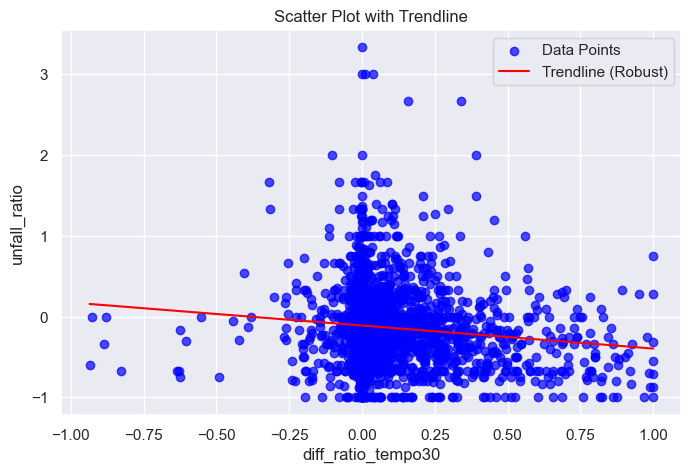

In [164]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit linear regression (robust alternative)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean["diff_ratio_tempo30"], df_clean["unfall_ratio"])

# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(df_clean["diff_ratio_tempo30"], df_clean["unfall_ratio"], color='blue', alpha=0.7, label="Data Points")

# Plot the trendline
x_vals = np.linspace(df_clean["diff_ratio_tempo30"].min(), df_clean["diff_ratio_tempo30"].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label="Trendline (Robust)")

# Labels
plt.xlabel("diff_ratio_tempo30")
plt.ylabel("unfall_ratio")
plt.title("Scatter Plot with Trendline")
plt.legend()
plt.show()


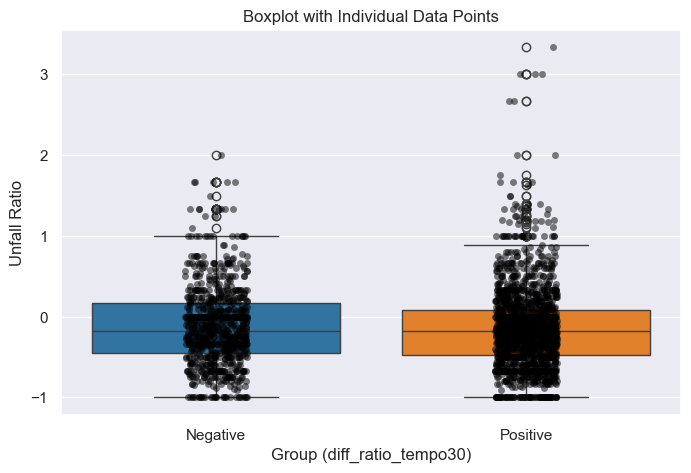

In [165]:
plt.figure(figsize=(8, 5))


# Create a new column to categorize the groups
df["group"] = df["diff_ratio_tempo30"].apply(lambda x: "Positive" if x > 0 else "Negative")

# Boxplot with fixed palette
sns.boxplot(x="group", y="unfall_ratio", data=df, hue="group", palette=["#1f77b4", "#ff7f0e"], legend=False)

# Overlay jittered data points
sns.stripplot(x="group", y="unfall_ratio", data=df, color="black", alpha=0.5, jitter=True)

# Labels
plt.xlabel("Group (diff_ratio_tempo30)")
plt.ylabel("Unfall Ratio")
plt.title("Boxplot with Individual Data Points")

plt.show()


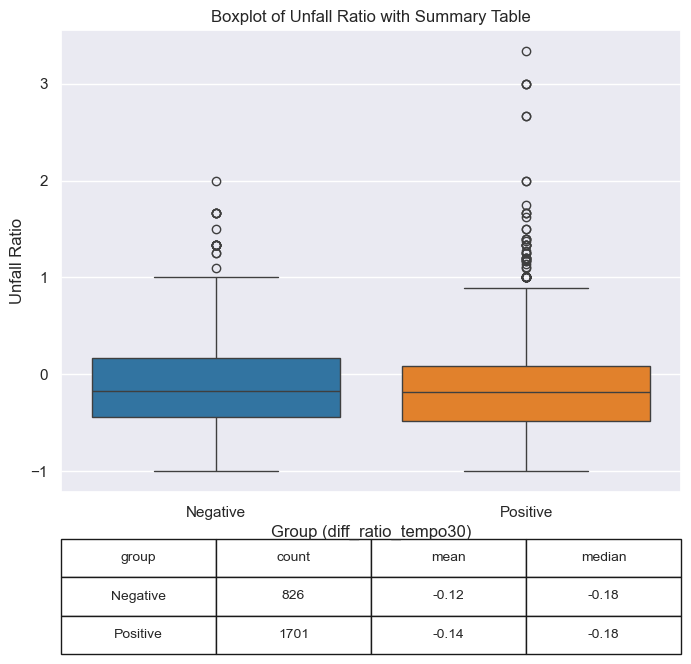

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a new column to categorize the groups
df["group"] = df["diff_ratio_tempo30"].apply(lambda x: "Positive" if x > 0 else "Negative")

# Calculate summary statistics
summary = df.groupby("group")["unfall_ratio"].agg(["count", "mean", "median"]).reset_index()

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x="group", y="unfall_ratio", data=df, hue="group", palette=["#1f77b4", "#ff7f0e"], legend=False, ax=ax)

# Labels
plt.xlabel("Group (diff_ratio_tempo30)")
plt.ylabel("Unfall Ratio")
plt.title("Boxplot of Unfall Ratio with Summary Table")

# Create a table below the boxplot
table_data = summary.round(2)  # Round values for better readability
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  bbox=[0, -0.35, 1, 0.25])  # Positioning the table

table.auto_set_font_size(False)
table.set_fontsize(10)

# Show the plot
plt.show()


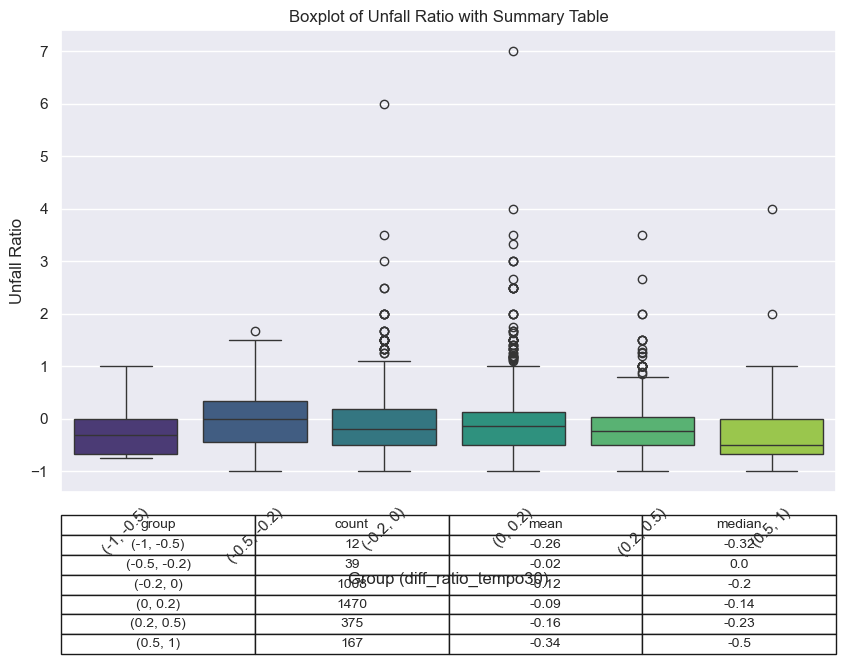

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define bins and labels
bins = [-1, -0.5, -0.2, 0, 0.2, 0.5, 1]  # Bin edges
labels = ["(-1, -0.5)", "(-0.5, -0.2)", "(-0.2, 0)", "(0, 0.2)", "(0.2, 0.5)", "(0.5, 1)"]  # Bin labels

# Create a new column categorizing the data into bins
#df["group"] = pd.cut(df["diff_ratio_tempo30"], bins=bins, labels=labels, include_lowest=True)
df.loc[:, "group"] = pd.cut(df["diff_ratio_tempo30"], bins=bins, labels=labels, include_lowest=True)

# Calculate summary statistics
#summary = df.groupby("group")["unfall_ratio"].agg(["count", "mean", "median"]).reset_index()
summary = df.groupby("group", observed=False)["unfall_ratio"].agg(["count", "mean", "median"]).reset_index()

# Create the boxplot
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x="group", y="unfall_ratio", data=df, hue="group", palette="viridis", ax=ax)

# Labels
plt.xlabel("Group (diff_ratio_tempo30)")
plt.ylabel("Unfall Ratio")
plt.title("Boxplot of Unfall Ratio with Summary Table")

# Create a table below the boxplot
table_data = summary.round(2)  # Round values for better readability
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  bbox=[0, -0.35, 1, 0.3])  # Positioning the table

table.auto_set_font_size(False)
table.set_fontsize(10)

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


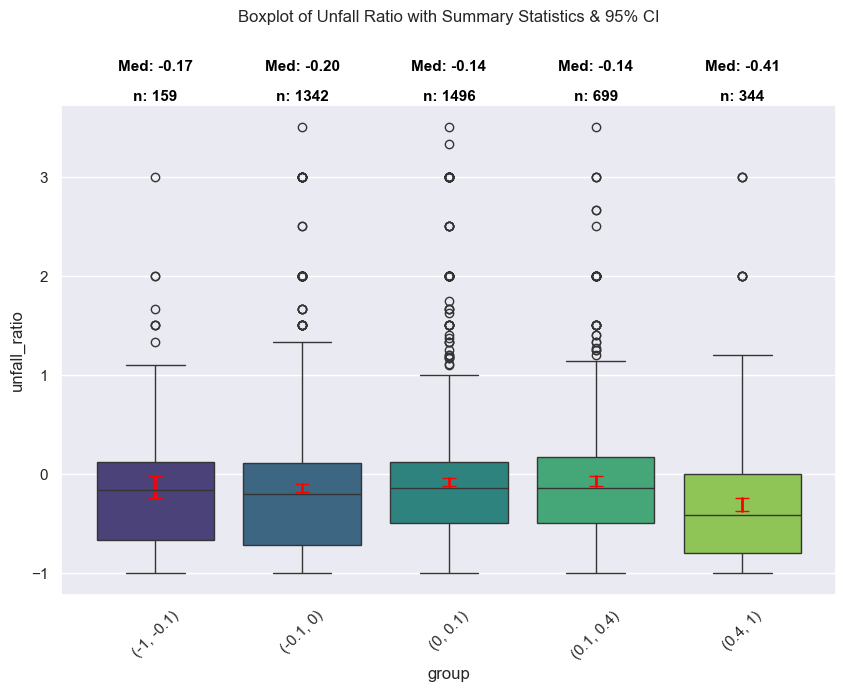

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme()


df = fin_join
df=df[df.vorher>=0].copy()
df=df[df.unfall_ratio<4]

# Define bins and labels for categorizing `diff_ratio_tempo30`
#bins = [-1, -0.2, 0, 0.2, 1]  # Bin edges
#labels = ["(-1, -0.2)", "(-0.2, 0)", "(0, 0.2)", "(0.2, 1)"]  # Bin labels

# Define bins and labels
#bins = [-1, -0.2, 0, 0.2, 0.5, 1]  # Bin edges
#labels = ["(-1, -0.2)", "(-0.2, 0)", "(0, 0.2)", "(0.2, 0.5)", "(0.5, 1)"]  # Bin labels

# Define bins and labels
bins = [-1, -0.1, 0, 0.1, 0.4, 1]  # Bin edges
labels = ["(-1, -0.1)", "(-0.1, 0)", "(0, 0.1)", "(0.1, 0.4)",  "(0.4, 1)"]  # Bin labels

# Create a new column categorizing the data into bins
#df["group"] = pd.cut(df["diff_ratio_tempo30"], bins=bins, labels=labels, include_lowest=True)
df.loc[:, "group"] = pd.cut(df["diff_ratio_tempo30"], bins=bins, labels=labels, include_lowest=True)

# Calculate summary statistics
#summary = df.groupby("group")["unfall_ratio"].agg(["count", "mean", "median", "std"]).reset_index()
summary = df.groupby("group", observed=False)["unfall_ratio"].agg(["count", "mean", "median","std"]).reset_index()

# **Compute 95% Confidence Interval**
summary["ci_lower"] = summary["mean"] - 1.96 * (summary["std"] / np.sqrt(summary["count"]))
summary["ci_upper"] = summary["mean"] + 1.96 * (summary["std"] / np.sqrt(summary["count"]))

# Create the boxplot
fig, ax = plt.subplots(figsize=(10, 7))

sns.boxplot(x="group", y="unfall_ratio", data=df, hue="group", palette="viridis", ax=ax)

# **Move title higher**
plt.title("Boxplot of Unfall Ratio with Summary Statistics & 95% CI", pad=60)

# **Set fixed Y-position for summary stats (closer to chart)**
y_position = ax.get_ylim()[1] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.01  # Closer to plot

# **Spacing factor for better line separation**
line_spacing = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.03  # Adjust spacing between lines

# **Add Summary Statistics in multi-line format**
for i, row in summary.iterrows():
    x_pos = i  # X-axis position aligned with boxplot
    
    # Add count, mean, and median (each on a new line with improved spacing)
    ax.text(x_pos, y_position, f"n: {int(row['count'])}", ha='center', fontsize=11, fontweight="bold", color="black")
    #ax.text(x_pos, y_position + line_spacing, f"Mean: {row['mean']:.2f}", ha='center', fontsize=11, fontweight="bold", color="darkred")
    ax.text(x_pos, y_position + line_spacing * 2, f"Med: {row['median']:.2f}", ha='center', fontsize=11, fontweight="bold", color="black")

    # **Plot Confidence Interval (CI) as error bars**
    ax.plot([x_pos, x_pos], [row["ci_lower"], row["ci_upper"]], color="red", linewidth=2, marker="_", markersize=10)

# Adjust plot layout
plt.subplots_adjust(top=0.85, bottom=0.15)  # Moves title up, allows space below
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


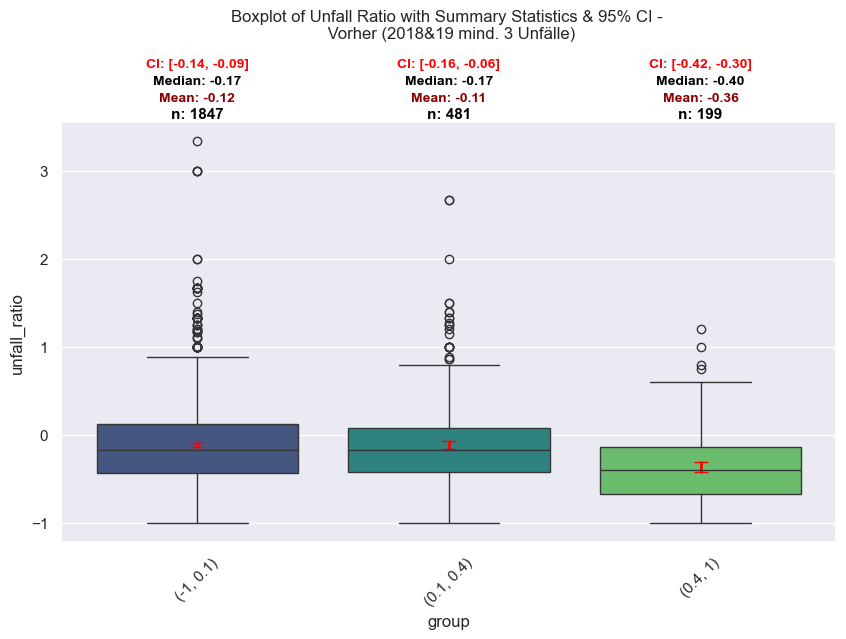

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme()


df = fin_join
df=df[df.vorher>=3].copy()
#df=df[df.unfall_ratio<4]

# Define bins and labels for categorizing `diff_ratio_tempo30`
#bins = [-1, -0.2, 0, 0.2, 1]  # Bin edges
#labels = ["(-1, -0.2)", "(-0.2, 0)", "(0, 0.2)", "(0.2, 1)"]  # Bin labels

# Define bins and labels
#bins = [-1, -0.2, 0, 0.2, 0.5, 1]  # Bin edges
#labels = ["(-1, -0.2)", "(-0.2, 0)", "(0, 0.2)", "(0.2, 0.5)", "(0.5, 1)"]  # Bin labels

# Define bins and labels
bins = [-1, 0.1, 0.4, 1]  # Bin edges
labels = ["(-1, 0.1)", "(0.1, 0.4)",  "(0.4, 1)"]  # Bin labels

# Create a new column categorizing the data into bins
#df["group"] = pd.cut(df["diff_ratio_tempo30"], bins=bins, labels=labels, include_lowest=True)
df.loc[:, "group"] = pd.cut(df["diff_ratio_tempo30"], bins=bins, labels=labels, include_lowest=True)

# Calculate summary statistics
#summary = df.groupby("group")["unfall_ratio"].agg(["count", "mean", "median", "std"]).reset_index()
summary = df.groupby("group", observed=False)["unfall_ratio"].agg(["count", "mean", "median","std"]).reset_index()

# **Compute 95% Confidence Interval**
summary["ci_lower"] = summary["mean"] - 1.96 * (summary["std"] / np.sqrt(summary["count"]))
summary["ci_upper"] = summary["mean"] + 1.96 * (summary["std"] / np.sqrt(summary["count"]))

# Create the boxplot
fig, ax = plt.subplots(figsize=(10, 7))

sns.boxplot(x="group", y="unfall_ratio", data=df, hue="group", palette="viridis", ax=ax)

# **Move title higher**
plt.title("Boxplot of Unfall Ratio with Summary Statistics & 95% CI - \n Vorher (2018 & 19 mind. 3 Unfälle)", pad=60)

# **Set fixed Y-position for summary stats (closer to chart)**
y_position = ax.get_ylim()[1] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.01  # Closer to plot

# **Spacing factor for better line separation**
line_spacing = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.04  # Adjust spacing between lines

# **Add Summary Statistics in multi-line format**
for i, row in summary.iterrows():
    x_pos = i  # X-axis position aligned with boxplot
    
    # Add count, mean, and median (each on a new line with improved spacing)
    ax.text(x_pos, y_position, f"n: {int(row['count'])}", ha='center', fontsize=11, fontweight="bold", color="black")
    ax.text(x_pos, y_position + line_spacing, f"Mean: {row['mean']:.2f}", ha='center', fontsize=10, fontweight="bold", color="darkred")
    ax.text(x_pos, y_position + line_spacing * 2, f"Median: {row['median']:.2f}", ha='center', fontsize=10, fontweight="bold", color="black")
       
    # **Add CI below "n"**
    ci_text = f"CI: [{row['ci_lower']:.2f}, {row['ci_upper']:.2f}]"
    ax.text(x_pos, y_position + line_spacing * 3, ci_text, 
            ha='center', fontsize=10, fontweight="bold", color="red")

    # **Plot Confidence Interval (CI) as error bars**
    ax.plot([x_pos, x_pos], [row["ci_lower"], row["ci_upper"]], color="red", linewidth=2, marker="_", markersize=10)

# Adjust plot layout
plt.subplots_adjust(top=0.80, bottom=0.2)  # Moves title up, allows space below
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


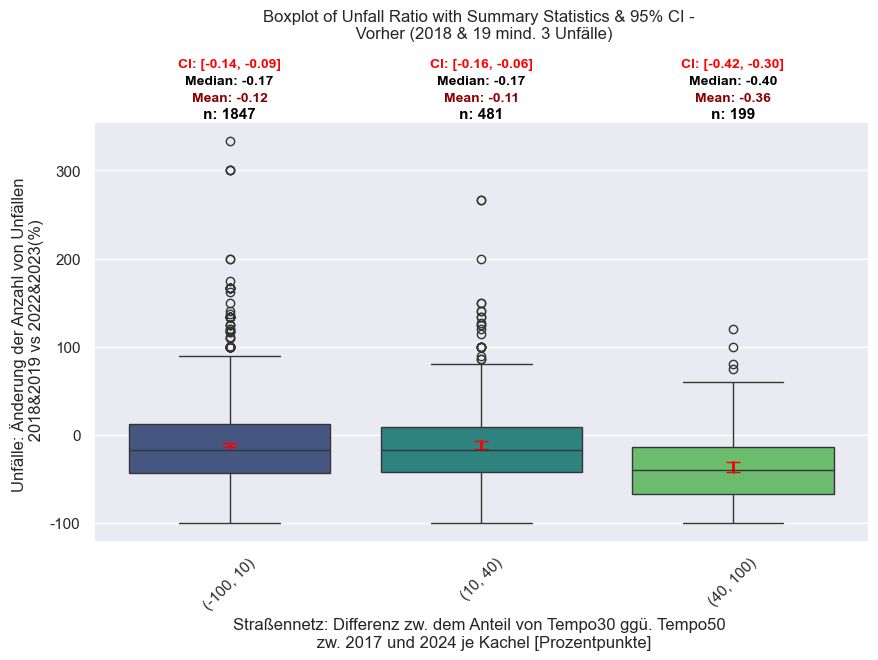

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme()


df = fin_join
df=df[df.vorher>=3].copy()
#df=df[df.unfall_ratio<4]

# Define bins and labels for categorizing `diff_ratio_tempo30`
#bins = [-1, -0.2, 0, 0.2, 1]  # Bin edges
#labels = ["(-1, -0.2)", "(-0.2, 0)", "(0, 0.2)", "(0.2, 1)"]  # Bin labels

# Define bins and labels
#bins = [-1, -0.2, 0, 0.2, 0.5, 1]  # Bin edges
#labels = ["(-1, -0.2)", "(-0.2, 0)", "(0, 0.2)", "(0.2, 0.5)", "(0.5, 1)"]  # Bin labels

# Define bins and labels
bins = [-1, 0.1, 0.4, 1]  # Bin edges
labels = ["(-100, 10)", "(10, 40)",  "(40, 100)"]  # Bin labels

# Create a new column categorizing the data into bins
#df["group"] = pd.cut(df["diff_ratio_tempo30"], bins=bins, labels=labels, include_lowest=True)
df.loc[:, "group"] = pd.cut(df["diff_ratio_tempo30"], bins=bins, labels=labels, include_lowest=True)

# Calculate summary statistics
#summary = df.groupby("group")["unfall_ratio"].agg(["count", "mean", "median", "std"]).reset_index()
summary = df.groupby("group", observed=False)["unfall_ratio"].agg(["count", "mean", "median","std"]).reset_index()

# **Compute 95% Confidence Interval**
summary["ci_lower"] = summary["mean"] - 1.96 * (summary["std"] / np.sqrt(summary["count"]))
summary["ci_upper"] = summary["mean"] + 1.96 * (summary["std"] / np.sqrt(summary["count"]))


# **Create the boxplot**
fig, ax = plt.subplots(figsize=(10, 7))

sns.boxplot(x="group", y="unfall_ratio", data=df, hue="group", palette="viridis", ax=ax)

# **Custom Axis Titles**
plt.xlabel("Straßennetz: Differenz zw. dem Anteil von Tempo30 ggü. Tempo50 \n zw. 2017 und 2024 je Kachel [Prozentpunkte]")  # Change X-axis title
plt.ylabel("Unfälle: Änderung der Anzahl von Unfällen \n 2018&2019 vs 2022&2023(%)")  # Change Y-axis title

# **Modify Y-axis tick labels to show values as integers multiplied by 100**
def format_ticks(y, _):
    return f"{int(y * 100)}"  # Convert to integer and multiply by 100

ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_ticks))

# **Move title higher**
plt.title("Boxplot of Unfall Ratio with Summary Statistics & 95% CI - \n Vorher (2018 & 19 mind. 3 Unfälle)", pad=60)

# **Set fixed Y-position for summary stats (closer to chart)**
y_position = ax.get_ylim()[1] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.01  # Closer to plot

# **Spacing factor for better line separation**
line_spacing = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.04  # Adjust spacing between lines

# **Add Summary Statistics in multi-line format**
for i, row in summary.iterrows():
    x_pos = i  # X-axis position aligned with boxplot
    
    # Add count, mean, and median (each on a new line with improved spacing)
    ax.text(x_pos, y_position, f"n: {int(row['count'])}", ha='center', fontsize=11, fontweight="bold", color="black")
    ax.text(x_pos, y_position + line_spacing, f"Mean: {row['mean']:.2f}", ha='center', fontsize=10, fontweight="bold", color="darkred")
    ax.text(x_pos, y_position + line_spacing * 2, f"Median: {row['median']:.2f}", ha='center', fontsize=10, fontweight="bold", color="black")
       
    # **Add CI below "n"**
    ci_text = f"CI: [{row['ci_lower']:.2f}, {row['ci_upper']:.2f}]"
    ax.text(x_pos, y_position + line_spacing * 3, ci_text, 
            ha='center', fontsize=10, fontweight="bold", color="red")

    # **Plot Confidence Interval (CI) as error bars**
    ax.plot([x_pos, x_pos], [row["ci_lower"], row["ci_upper"]], color="red", linewidth=2, marker="_", markersize=10)

# Adjust plot layout
plt.subplots_adjust(top=0.80, bottom=0.2)  # Moves title up, allows space below
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


In [70]:
### nur schere Unfälle

C:\Users\simon\AppData\Local\Temp\ipykernel_21628\3951314366.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby("group")["unfall_ratio"].agg(["count", "mean", "median", "std"]).reset_index()
C:\Users\simon\AppData\Local\Temp\ipykernel_21628\3951314366.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y="unfall_ratio", data=df, palette="viridis", ax=ax)


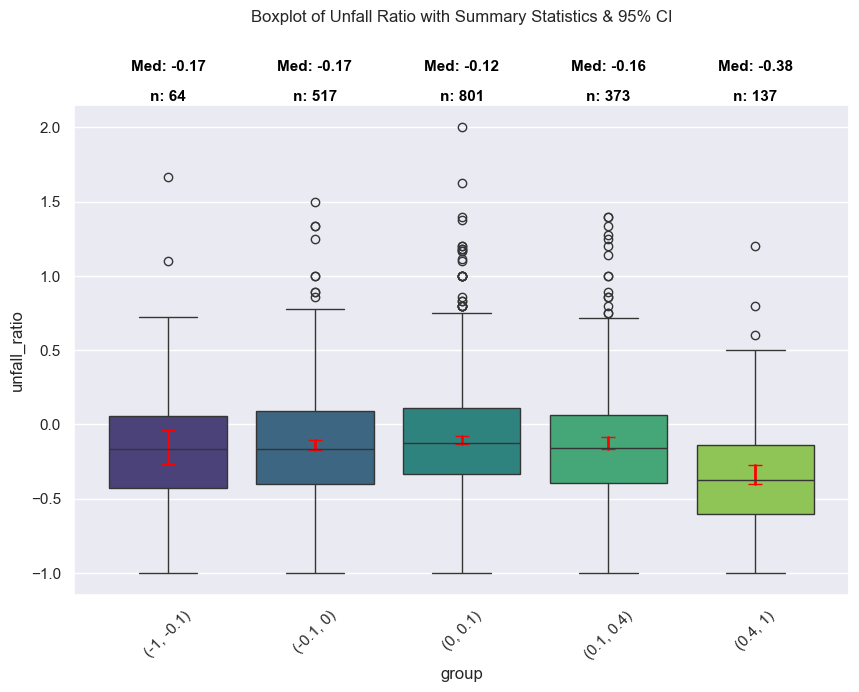

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme()

df = fin_join

df=df[df.vorher>=5]
df=df[df.unfall_ratio<4]

# Define bins and labels for categorizing `diff_ratio_tempo30`
#bins = [-1, -0.2, 0, 0.2, 1]  # Bin edges
#labels = ["(-1, -0.2)", "(-0.2, 0)", "(0, 0.2)", "(0.2, 1)"]  # Bin labels

# Define bins and labels
#bins = [-1, -0.2, 0, 0.2, 0.5, 1]  # Bin edges
#labels = ["(-1, -0.2)", "(-0.2, 0)", "(0, 0.2)", "(0.2, 0.5)", "(0.5, 1)"]  # Bin labels

# Define bins and labels
bins = [-1, -0.1, 0, 0.1, 0.4, 1]  # Bin edges
labels = ["(-1, -0.1)", "(-0.1, 0)", "(0, 0.1)", "(0.1, 0.4)", "(0.4, 1)"]  # Bin labels

# Create a new column categorizing the data into bins
df["group"] = pd.cut(df["diff_ratio_tempo30"], bins=bins, labels=labels, include_lowest=True)

# Calculate summary statistics
summary = df.groupby("group")["unfall_ratio"].agg(["count", "mean", "median", "std"]).reset_index()

# **Compute 95% Confidence Interval**
summary["ci_lower"] = summary["mean"] - 1.96 * (summary["std"] / np.sqrt(summary["count"]))
summary["ci_upper"] = summary["mean"] + 1.96 * (summary["std"] / np.sqrt(summary["count"]))

# Create the boxplot
fig, ax = plt.subplots(figsize=(10, 7))

sns.boxplot(x="group", y="unfall_ratio", data=df, palette="viridis", ax=ax)

# **Move title higher**
plt.title("Boxplot of Unfall Ratio with Summary Statistics & 95% CI", pad=60)

# **Set fixed Y-position for summary stats (closer to chart)**
y_position = ax.get_ylim()[1] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.01  # Closer to plot

# **Spacing factor for better line separation**
line_spacing = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.03  # Adjust spacing between lines

# **Add Summary Statistics in multi-line format**
for i, row in summary.iterrows():
    x_pos = i  # X-axis position aligned with boxplot
    
    # Add count, mean, and median (each on a new line with improved spacing)
    ax.text(x_pos, y_position, f"n: {int(row['count'])}", ha='center', fontsize=11, fontweight="bold", color="black")
    #ax.text(x_pos, y_position + line_spacing, f"Mean: {row['mean']:.2f}", ha='center', fontsize=11, fontweight="bold", color="darkred")
    ax.text(x_pos, y_position + line_spacing * 2, f"Med: {row['median']:.2f}", ha='center', fontsize=11, fontweight="bold", color="black")

    # **Plot Confidence Interval (CI) as error bars**
    ax.plot([x_pos, x_pos], [row["ci_lower"], row["ci_upper"]], color="red", linewidth=2, marker="_", markersize=10)

# Adjust plot layout
plt.subplots_adjust(top=0.85, bottom=0.15)  # Moves title up, allows space below
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()
